# Data Visualization of Stroke Prediction Dataset 

The main question I want to ask regarding strokes is if comorbidities such as hypetension, heart disease, BMI, diabetes can predict the likelihood of stroke. 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)
print('Seaborn:', sb.__version__)

df = pd.read_csv('stroke.csv')

df.head()


Numpy: 1.21.5
Pandas: 1.4.2
Seaborn: 0.11.2


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
print(df.dtypes)
print(df.info())

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9 

In [6]:
#What percentage of people had a stroke 
sum(df.stroke==1)/len(df)*100.0


4.87279843444227

# Hypertension versus Stroke Incedence 

In [12]:
#What is the breakdown of people who suffer from hypertension. 
df_grouped_hyp = df.groupby(by='hypertension')

for val,grp in df_grouped_hyp:
    if val == True: 
        print(f'There were {len(grp)} people that have hypertenion')
    if val == False: 
        print(f'There were {len(grp)} people that dont have hypertension')

        

There were 4612 people that dont have hypertension
There were 498 people that have hypertenion


In [13]:
print(df_grouped_hyp['stroke'].sum())
print('---------------------------------')
print(df_grouped_hyp.stroke.count())
print('---------------------------------')
print(df_grouped_hyp.stroke.sum()/ df_grouped_hyp.stroke.count())


hypertension
0    183
1     66
Name: stroke, dtype: int64
---------------------------------
hypertension
0    4612
1     498
Name: stroke, dtype: int64
---------------------------------
hypertension
0    0.039679
1    0.132530
Name: stroke, dtype: float64


In [23]:
more_likely_ratio = 0.132530/0.039679
print(more_likely_ratio)

3.340053932810807


According to our hyptension grouped data, those with hypertension are 3.3 time more likely to have a stroke when compared to those aren't diagnosed with hypertension.

# Heart Disease versus Stroke Incidence 

In [19]:
#What is the breakdown of people who suffer from heart disease. 
df_grouped_hd = df.groupby(by='heart_disease')

for val,grp in df_grouped_hd:
    if val == True: 
        print(f'There were {len(grp)} people that are diagnosed with heart disease')
    if val == False: 
        print(f'There were {len(grp)} people that are not diagnosed with heart disease')

There were 4834 people that are not diagnosed with heart disease
There were 276 people that are diagnosed with heart disease


In [20]:
print(df_grouped_hd['stroke'].sum())
print('---------------------------------')
print(df_grouped_hd.stroke.count())
print('---------------------------------')
print(df_grouped_hd.stroke.sum()/ df_grouped_hd.stroke.count())

heart_disease
0    202
1     47
Name: stroke, dtype: int64
---------------------------------
heart_disease
0    4834
1     276
Name: stroke, dtype: int64
---------------------------------
heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64


In [22]:
more_likely_ratio = 0.170290/0.041787
print(more_likely_ratio)

4.0751908488285835


According to our hyptension grouped data, those with heart diease are 4 time more likely to have a stroke when compared to those aren't diagnosed with hypertension.

# Marriage History versus Stroke Incedence

In [24]:
#What is the breakdown of people who have ever been married. 
df_grouped_mar = df.groupby(by='ever_married')

for val,grp in df_grouped_mar: 
    if val == 'Yes':
        print(f'There were {len(grp)} people that have been married')
    if val == 'No': 
        print(f'There were {len(grp)} people that have not ever been married')

There were 1757 people that have not ever been married
There were 3353 people that have been married


In [25]:
print(df_grouped_mar['stroke'].sum())
print('---------------------------------')
print(df_grouped_mar.stroke.count())
print('---------------------------------')
print(df_grouped_mar.stroke.sum()/ df_grouped_mar.stroke.count())

ever_married
No      29
Yes    220
Name: stroke, dtype: int64
---------------------------------
ever_married
No     1757
Yes    3353
Name: stroke, dtype: int64
---------------------------------
ever_married
No     0.016505
Yes    0.065613
Name: stroke, dtype: float64


In [26]:
more_likely_ratio = 0.065613/0.016505
print(more_likely_ratio)

3.97534080581642


According to our hyptension grouped data, those who have been married are 4 time more likely to have a stroke when compared to those who haven't ever been married.

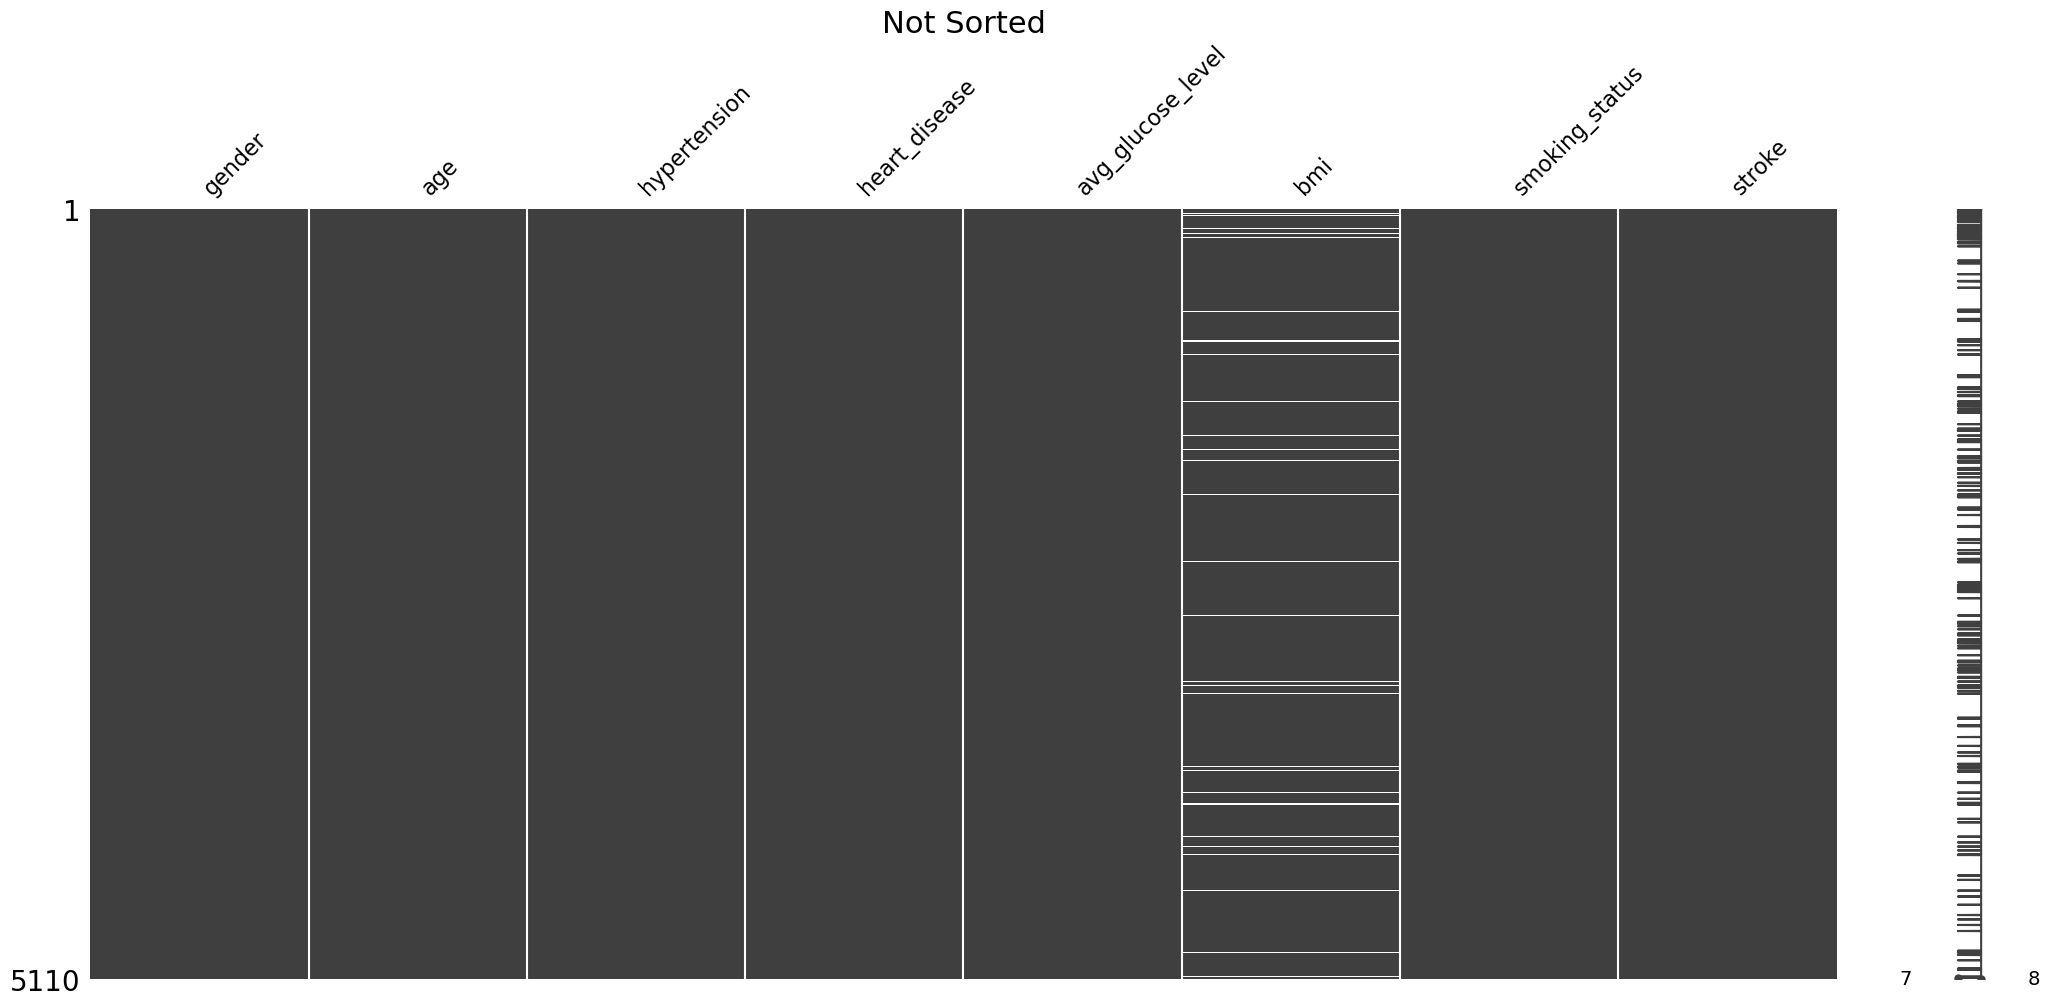

<Figure size 640x480 with 0 Axes>

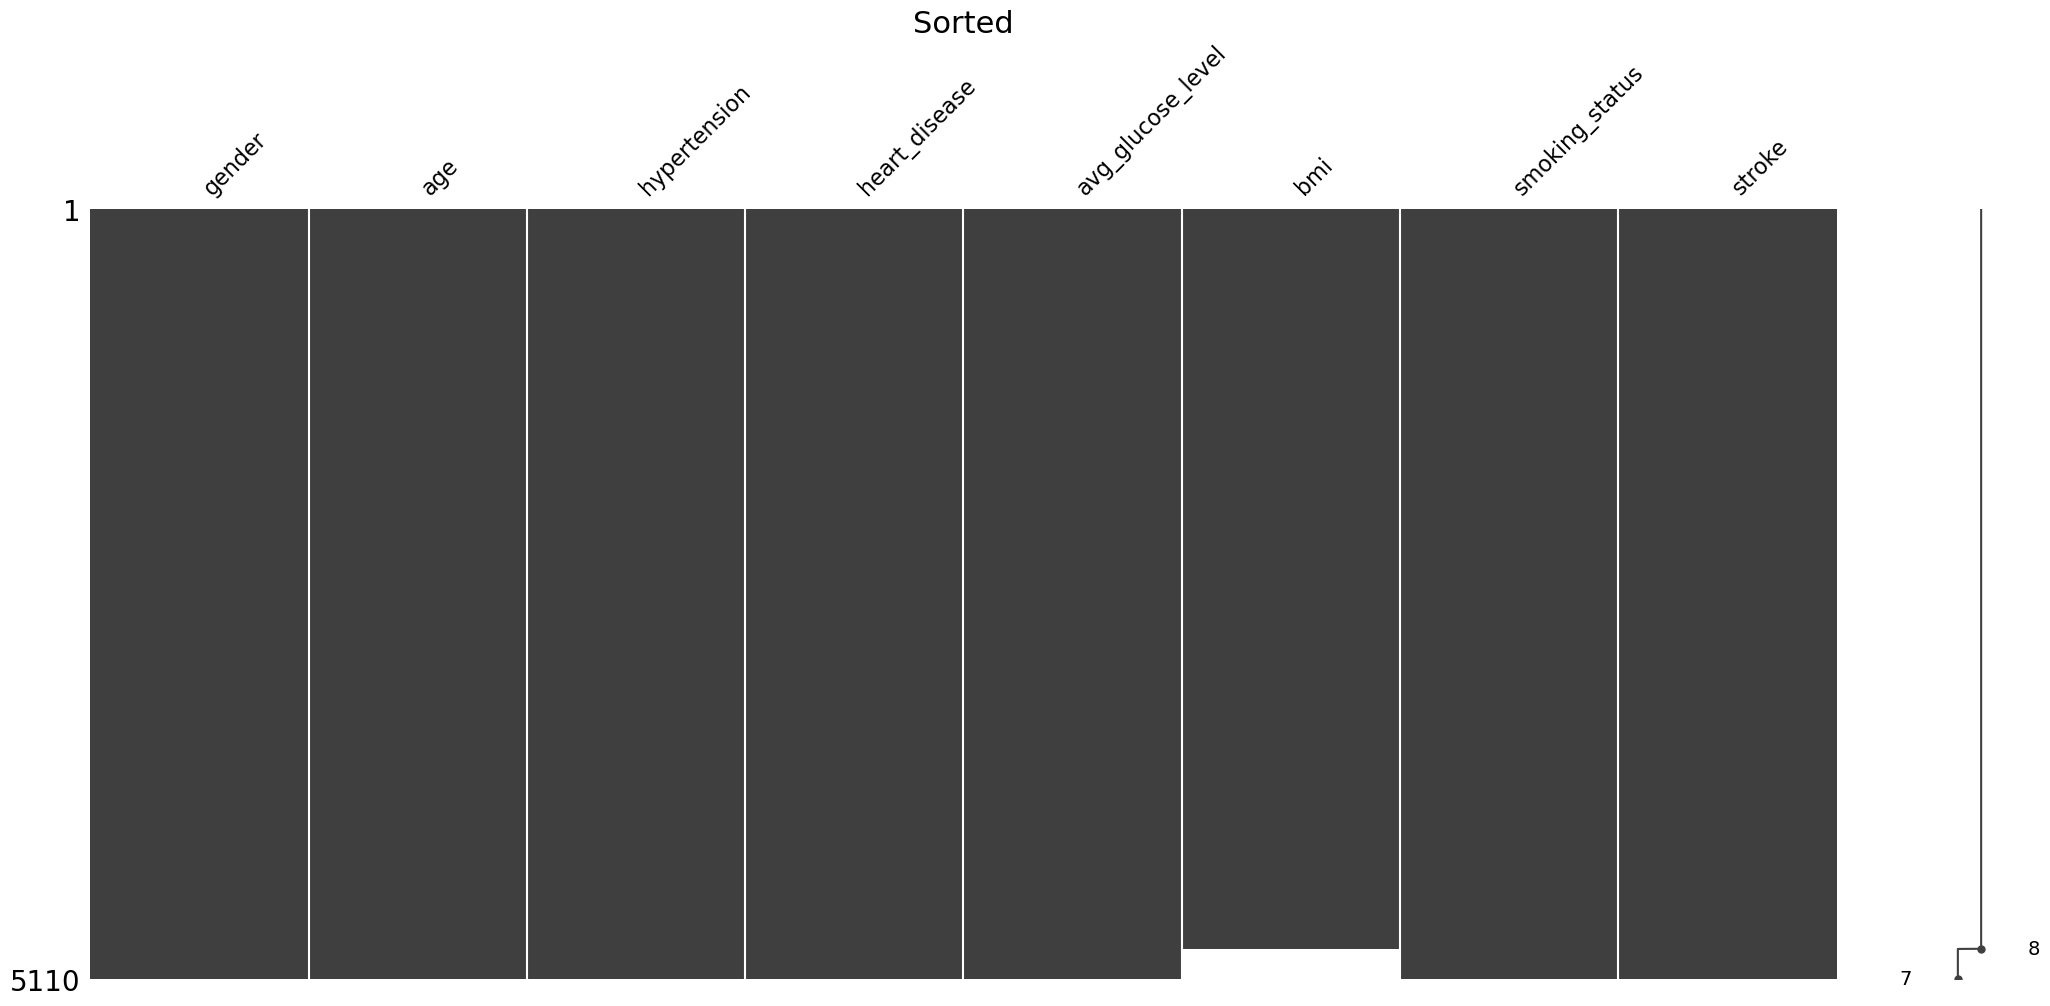

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore', )

import missingno as mn

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["bmi"]))
plt.title("Sorted", fontsize=22)
plt.show()

In [12]:
#Removing irrelevant attributes 

for col in ['id', 'ever_married', 'work_type', 'Residence_type']:
    if col in df:
        del df[col]
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


In [13]:
#impute missing BMI values using Split-Impute-Combine method

#bmi is suspected to by imputed according to their relation to heart disease, hypertension, glucose, and age 
df_grouped = df.groupby(by=['heart_disease', 'hypertension', 'avg_glucose_level', 'age'])
func = lambda grp: grp.fillna(grp.mean())
numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df_imputed_sic = df_grouped[numeric_columns].transform(func)

col_deleted = list( set(df.columns) - set(df_imputed_sic.columns))
df_imputed_sic[col_deleted] = df[col_deleted]

df_imputed_sic.dropna(inplace=True)

df_imputed_sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   int64  
 2   heart_disease      4909 non-null   int64  
 3   avg_glucose_level  4909 non-null   float64
 4   bmi                4909 non-null   float64
 5   stroke             4909 non-null   int64  
 6   smoking_status     4909 non-null   object 
 7   gender             4909 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 345.2+ KB


In [14]:
from sklearn.impute import KNNImputer 
import copy 

knn_obj = KNNImputer(n_neighbors=5)

features_to_use = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

temp = df[features_to_use].to_numpy()

knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

df_imputed = copy.deepcopy(df)
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True)
df_imputed.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   float64
dtypes: float64(6), object(2)
memory usage: 319.5+ KB


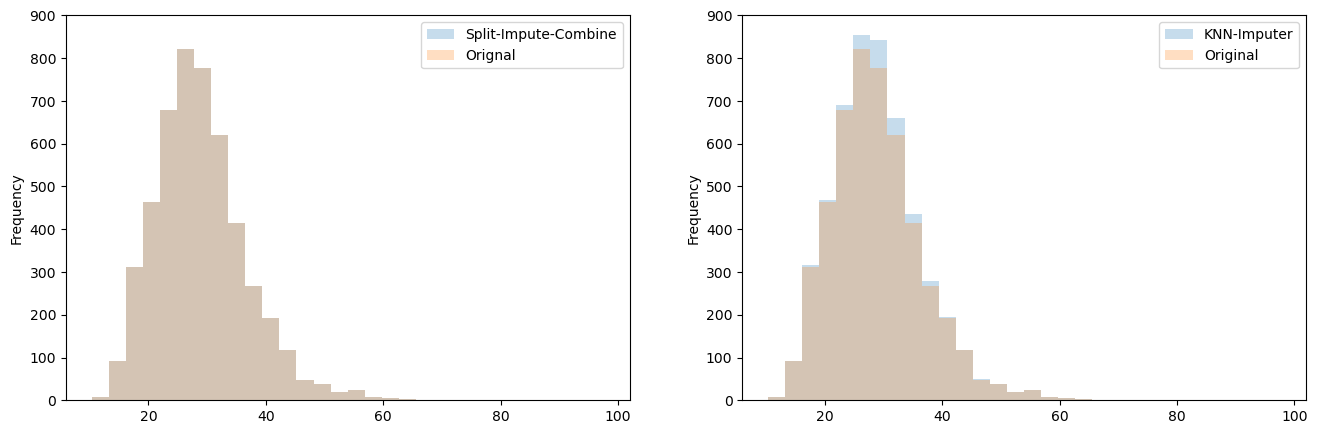

In [15]:
f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(1,2,1)
df_imputed_sic.bmi.plot(kind='hist', alpha=0.25, label="Split-Impute-Combine", bins=bin_num)

df.bmi.plot(kind='hist', alpha=0.25, label="Orignal", bins=bin_num)

plt.legend()
plt.ylim([0,900])

plt.subplot(1,2,2)
df_imputed.bmi.plot(kind='hist', alpha=0.25, label="KNN-Imputer", bins=bin_num)

df.bmi.plot(kind='hist', alpha=0.25, label="Original", bins=bin_num)

plt.legend()
plt.ylim([0,900])

plt.show()

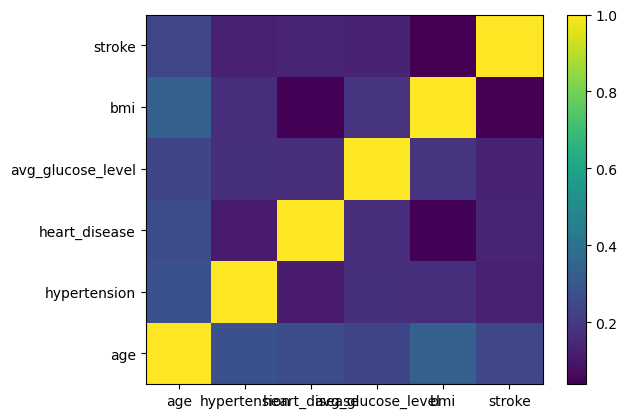

In [16]:
#correlation Plot 

vars_to_use = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
plt.pcolor(df_imputed[vars_to_use].corr())

plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

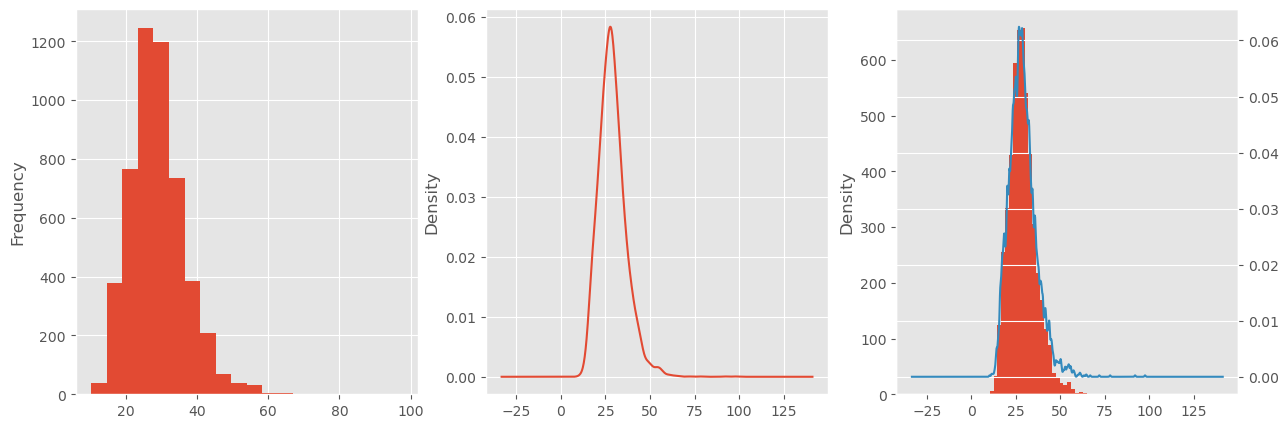

In [17]:
#Visualization Techniques: Histogram & Kernel Density 
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

#histogram of the BMI 
plt.subplot(1,3,1)
df_imputed.bmi.plot.hist(bins=20)

#KDE of the BMI 
plt.subplot(1,3,2)
df_imputed.bmi.plot.kde(bw_method=0.2)

#Overlapping the Histogram and KDE 
plt.subplot(1,3,3)
df_imputed.bmi.plot.hist(bins=40)
df_imputed.bmi.plot.kde(bw_method=0.04, secondary_y=True)
plt.show()



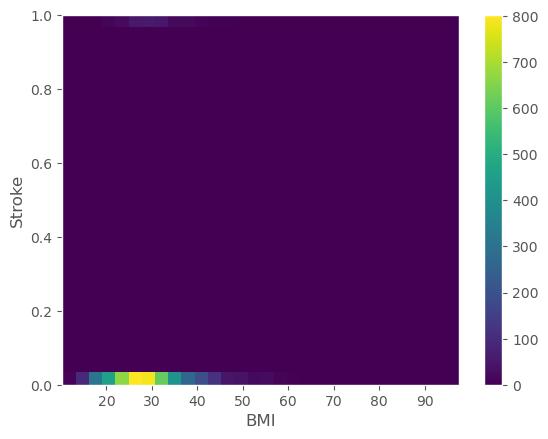

In [18]:
#Two-Dimensional Analysis of BMI with BMI and Stroke 

plt.hist2d(x=df_imputed.bmi, y=df_imputed.stroke, bins=30)
plt.colorbar()
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()

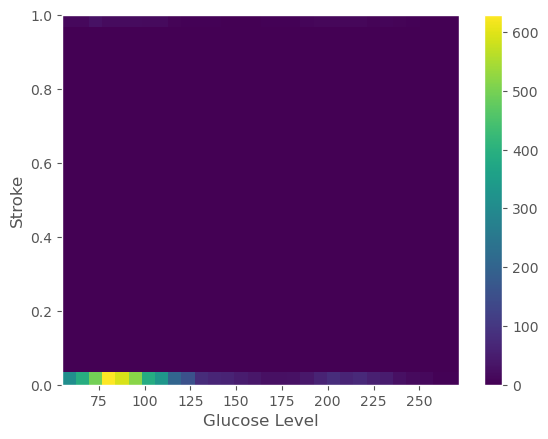

In [19]:
#Two-Dimensional Analysis of Glucose Level with Glucose Level and Stroke 

plt.hist2d(x=df_imputed.avg_glucose_level, y=df_imputed.stroke, bins=30)
plt.colorbar()
plt.xlabel('Glucose Level')
plt.ylabel('Stroke')
plt.show()

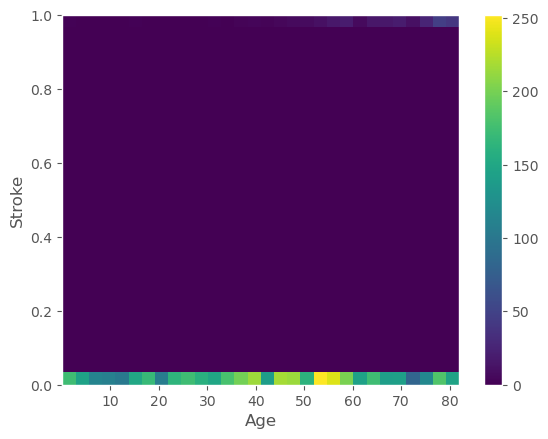

In [20]:
#Two-Dimensional Analysis of BMI with Age and Stroke 

plt.hist2d(x=df_imputed.age, y=df_imputed.stroke, bins=30)
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.show()

In [21]:
#We need to feature Discretization of BMI, Age, and Glucose Level  
df_imputed['age_range'] = pd.cut(df_imputed['age'],
                                [0,13,25,45,65,1e6],
                                labels=['toddler','child','young adult',
                                       'adult','senior'])
df_imputed.age_range.describe()


count      5110
unique        5
top       adult
freq       1527
Name: age_range, dtype: object

In [1]:
df_imputed['bmi_range'] = pd.cut(df_imputed['bmi'],
                                [0,18,25,30,35,1e6],
                                labels=['underweight','normal','overweight',
                                       'obese','morbidly obese'])
df_imputed.bmi_range.describe()

NameError: name 'pd' is not defined

In [23]:
df_imputed['glucose_range'] = pd.cut(df_imputed['avg_glucose_level'],
                                [0,53,70,125,200,1e6],
                                labels=['severe hypoglycemia','hypoglycemia','normal',
                                       'prediabetic','diabetic'])
df_imputed.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [24]:
#Group these with their stroke categories 
df_grouped = df_imputed.groupby(by=['bmi_range','age_range'])
print('Percentage of Stoke Status in Each Group:')
print(df_grouped.stroke.sum() / df_grouped.stroke.count()*100)
#df_grouped.stroke.count()

Percentage of Stoke Status in Each Group:
bmi_range       age_range  
underweight     toddler         0.393701
                child           0.000000
                young adult     0.000000
                adult           0.000000
                senior         10.000000
normal          toddler         0.000000
                child           0.000000
                young adult     0.324675
                adult           1.746725
                senior         18.539326
overweight      toddler         0.000000
                child           0.000000
                young adult     1.500000
                adult           5.144033
                senior         17.539267
obese           toddler         0.000000
                child           1.219512
                young adult     0.358423
                adult           6.142506
                senior         14.652015
morbidly obese  toddler         0.000000
                child           0.000000
                young adult 

In [25]:
df_grouped = df_imputed.groupby(by=['glucose_range','age_range'])
print('Percentage of Stoke Status in Each Group:')
print(df_grouped.stroke.sum() / df_grouped.stroke.count()*100)
df_grouped.stroke.count()

Percentage of Stoke Status in Each Group:
glucose_range        age_range  
severe hypoglycemia  toddler              NaN
                     child                NaN
                     young adult          NaN
                     adult                NaN
                     senior               NaN
hypoglycemia         toddler         0.000000
                     child           0.952381
                     young adult     1.025641
                     adult           3.125000
                     senior         13.600000
normal               toddler         0.211416
                     child           0.000000
                     young adult     0.728408
                     adult           4.628633
                     senior         13.601533
prediabetic          toddler         0.000000
                     child           0.000000
                     young adult     0.833333
                     adult           6.598985
                     senior         25.000000
diabe

glucose_range        age_range  
severe hypoglycemia  toddler          0
                     child            0
                     young adult      0
                     adult            0
                     senior           0
hypoglycemia         toddler        107
                     child          105
                     young adult    195
                     adult          224
                     senior         125
normal               toddler        473
                     child          469
                     young adult    961
                     adult          929
                     senior         522
prediabetic          toddler         60
                     child           69
                     young adult    120
                     adult          197
                     senior         120
diabetic             toddler          5
                     child            5
                     young adult     49
                     adult          177
       

In [26]:
df_grouped = df_imputed.groupby(by=['smoking_status','age_range'])
print('Percentage of Stoke Status in Each Group:')
print(df_grouped.stroke.sum() / df_grouped.stroke.count()*100)
df_grouped.stroke.count()

Percentage of Stoke Status in Each Group:
smoking_status   age_range  
Unknown          toddler         0.170940
                 child           0.458716
                 young adult     0.724638
                 adult           5.263158
                 senior         15.555556
formerly smoked  toddler         0.000000
                 child           0.000000
                 young adult     1.554404
                 adult           6.321839
                 senior         15.957447
never smoked     toddler         0.000000
                 child           0.000000
                 young adult     0.528169
                 adult           3.553299
                 senior         17.054264
smokes           toddler         0.000000
                 child           0.000000
                 young adult     1.041667
                 adult           7.260726
                 senior         14.655172
Name: stroke, dtype: float64


smoking_status   age_range  
Unknown          toddler        585
                 child          218
                 young adult    276
                 adult          285
                 senior         180
formerly smoked  toddler         12
                 child           50
                 young adult    193
                 adult          348
                 senior         282
never smoked     toddler         45
                 child          301
                 young adult    568
                 adult          591
                 senior         387
smokes           toddler          3
                 child           79
                 young adult    288
                 adult          303
                 senior         116
Name: stroke, dtype: int64

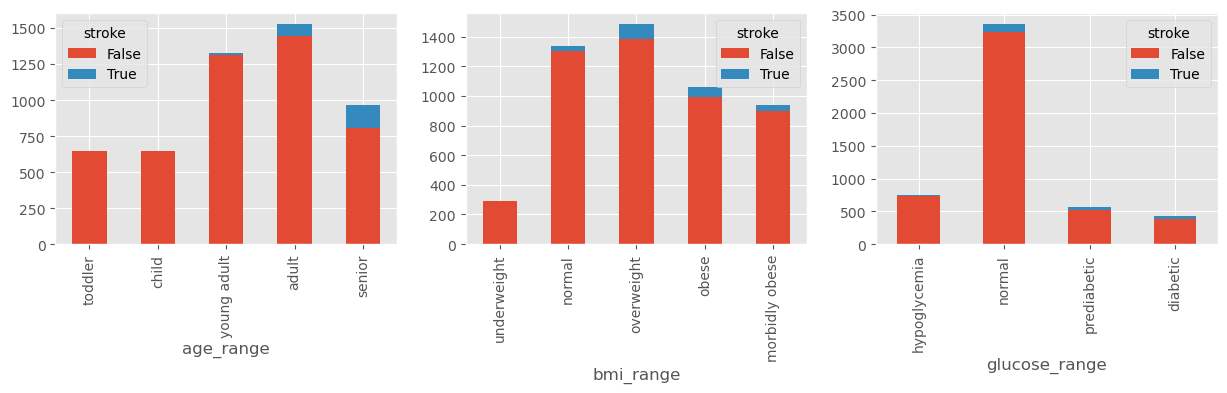

In [27]:
#Grouped Count Stoke Plots 
#The three subplots will be of Age, BMI, and Heart Disease 
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

pd.crosstab([df_imputed['age_range']],
           df_imputed.stroke.astype(bool)).plot(kind='bar', stacked=True, ax=ax1)

pd.crosstab([df_imputed['bmi_range']],
           df_imputed.stroke.astype(bool)).plot(kind='bar', stacked=True, ax=ax2)

pd.crosstab([df_imputed['glucose_range']],
           df_imputed.stroke.astype(bool)).plot(kind='bar', stacked=True, ax=ax3)
plt.show()

In [28]:
df = pd.read_csv('stroke.csv')
pd.get_dummies(df.smoking_status)

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


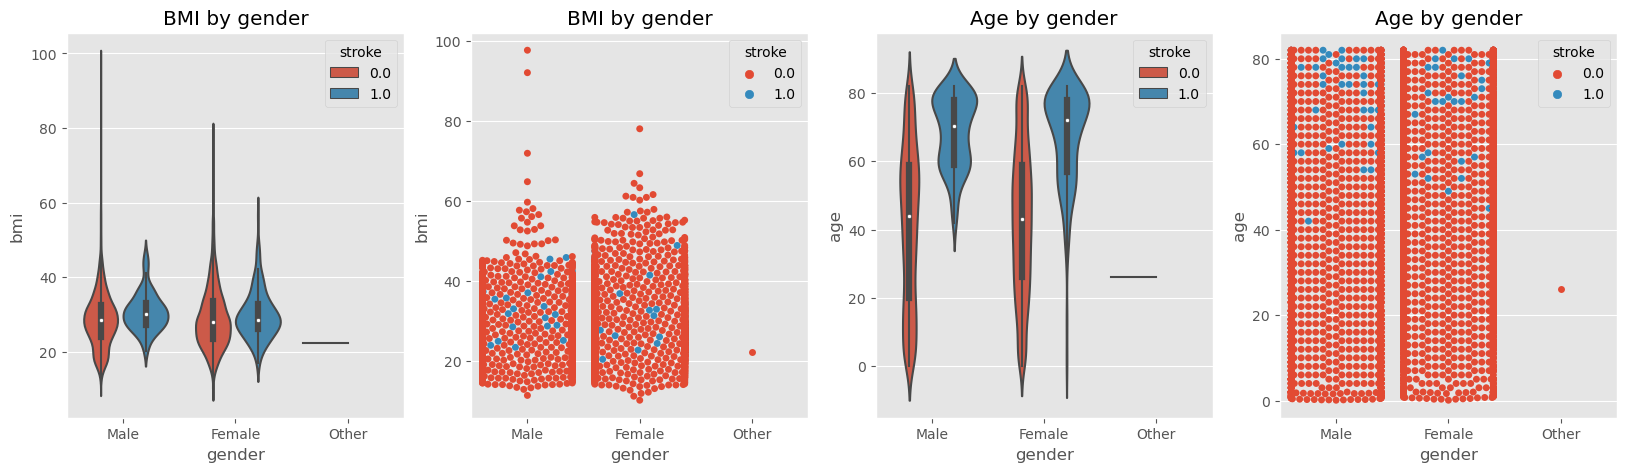

In [34]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 4, 1)
sb.violinplot(x="gender", y="bmi", hue="stroke", data=df_imputed)
plt.title('BMI by gender')

plt.subplot(1,4,2)
sb.swarmplot(x="gender", y="bmi", hue="stroke", data=df_imputed)
plt.title('BMI by gender')

plt.subplot(1, 4, 3)
sb.violinplot(x="gender", y="age", hue="stroke", data=df_imputed)
plt.title('Age by gender')

plt.subplot(1,4,4)
sb.swarmplot(x="gender", y="age", hue="stroke", data=df_imputed)
plt.title('Age by gender')
plt.show()

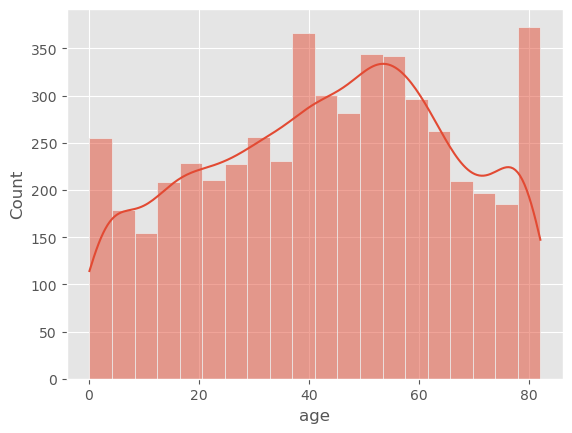

In [37]:
sb.histplot(df_imputed.age, kde=True)
plt.show()

<AxesSubplot:>

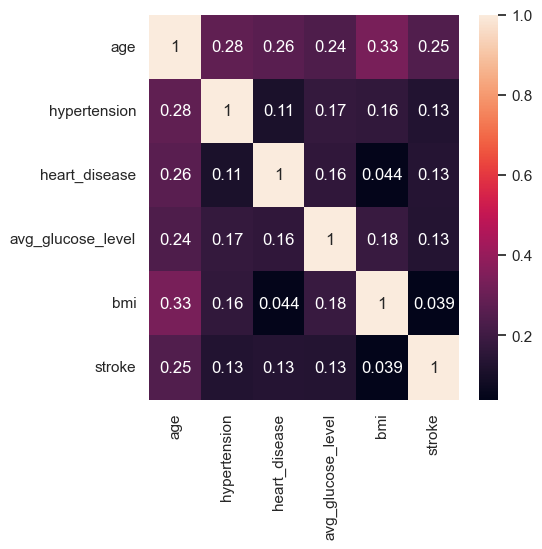

In [38]:
cmap = sb.set()
f, ax = plt.subplots(figsize=(5,5))
sb.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline
sb.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

df = pd.read_csv('stroke.csv')
df = df.dropna()
sb.pairplot(df, hue='smoking_status')


import umap
reducer = umap.UMAP()

df_data = df[
    [
        "age",
        "avg_glucose_level",
        "bmi",
        "stroke",
    ]
].values

scaled_df_data = StandardScaler().fit_transform(df_data)
embedding = reducer.fit_transform(scaled_df_data)
embedding.shape

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sb.color_palette()[x] for x in df.smoking_status.map({"never smoked":0, "formerly smoked":1, "smokes":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Stroke dataset', fontsize=24)